In [1]:
import matplotlib.pyplot as plt
import cv2

C:\Users\Vamc0\AppData\Local\Temp\ipykernel_6624\1261395262.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


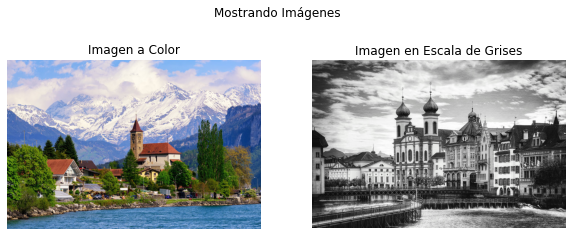

In [2]:
# EJERCICIO 1 

ubicacion_color = 'C:/Users/Vamc0/Documents/CARRERA ICE/9NO SEM 2023-1/VISION_COMPU/Practicas/imagenes/paisaje.jpg'

img_color_bgr = cv2.imread(ubicacion_color) #lee la imagen en espacio de color bgr
img_color_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB) #se convierte la imagen leida a espacio de color rgb

img_bandw_bgr = cv2.imread('C:/Users/Vamc0/Documents/CARRERA ICE/9NO SEM 2023-1/VISION_COMPU/Practicas/imagenes/blackandwhite.jpg')
img_bandw_rgb = cv2.cvtColor(img_bandw_bgr, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].imshow(img_color_rgb)
ax[0].set_title('Imagen a Color')

ax[1].imshow(img_bandw_bgr)
ax[1].set_title('Imagen en Escala de Grises')

ax[0].axis('off')
ax[1].axis('off')

fig.suptitle('Mostrando Imágenes')
fig.show()


C:\Users\Vamc0\AppData\Local\Temp\ipykernel_6624\161521003.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


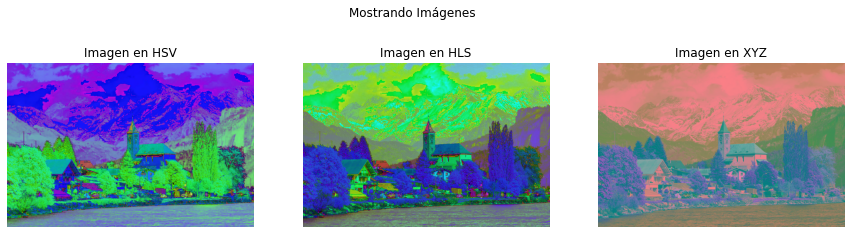

In [3]:
#EJERCICIO 2

img_color_hsv = cv2.cvtColor(img_color_rgb, cv2.COLOR_RGB2HSV)
img_color_hls = cv2.cvtColor(img_color_rgb, cv2.COLOR_RGB2HLS)
img_color_lab = cv2.cvtColor(img_color_rgb, cv2.COLOR_RGB2LAB)

fig, ax = plt.subplots(1,3, figsize=(15,4))

ax[0].imshow(img_color_hsv)
ax[0].set_title('Imagen en HSV')

ax[1].imshow(img_color_hls)
ax[1].set_title('Imagen en HLS')

ax[2].imshow(img_color_lab)
ax[2].set_title('Imagen en XYZ')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

fig.suptitle('Mostrando imagen en 3 espcios diferentes')
#fig.savefig('C:/Users/Vamc0/Documents/CARRERA ICE/9NO SEM 2023-1/VISION_COMPU/Practicas/imagenes/tres_espacios.jpg')
fig.show()

C:\Users\Vamc0\AppData\Local\Temp\ipykernel_6624\3796931096.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


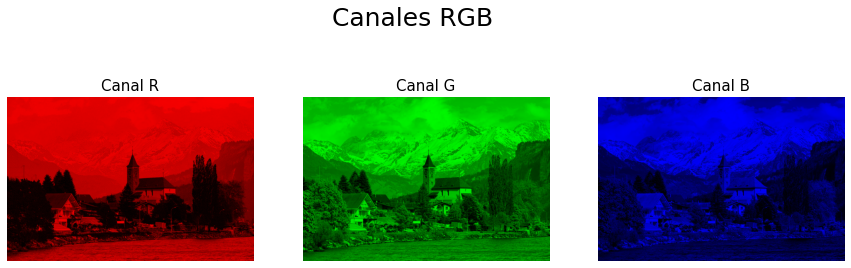

In [4]:
#EJERCICIO 3

fig, ax = plt.subplots(1,3, figsize=(15,5))

img_color_rgb = cv2.imread(ubicacion_color)
img_color_rgb[:,:,1] = 0
img_color_rgb[:,:,2] = 0
ax[0].imshow(img_color_rgb)
ax[0].set_title('Canal R', size=15)

img_color_rgb = cv2.imread(ubicacion_color)
img_color_rgb[:,:,0] = 0
img_color_rgb[:,:,2] = 0
ax[1].imshow(img_color_rgb)
ax[1].set_title('Canal G', size=15)

img_color_rgb = cv2.imread(ubicacion_color)
img_color_rgb[:,:,0] = 0
img_color_rgb[:,:,1] = 0
ax[2].imshow(img_color_rgb)
ax[2].set_title('Canal B', size=15)

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

fig.suptitle('Canales RGB', size=25)
fig.show()

C:\Users\Vamc0\AppData\Local\Temp\ipykernel_6624\3521913465.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


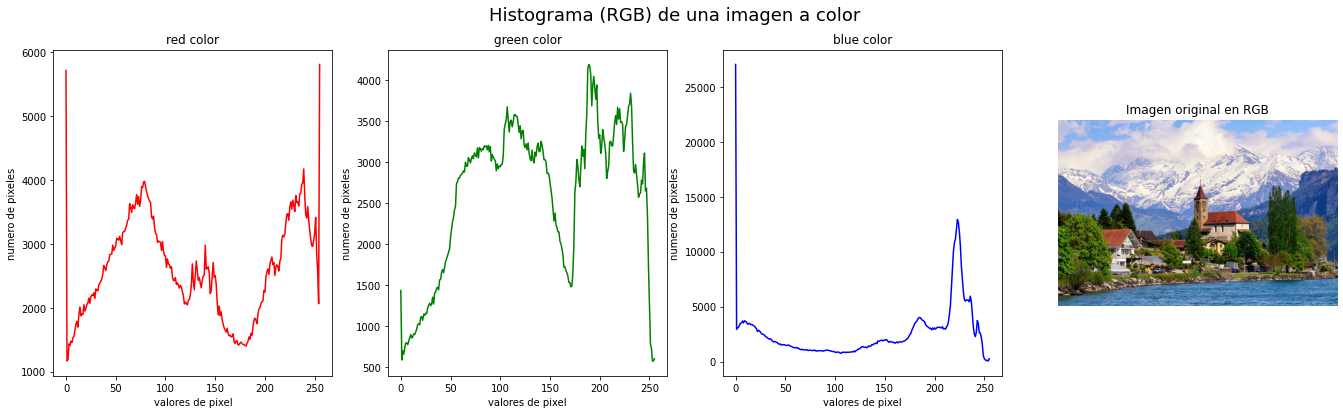

In [120]:
#EJERCICIO 4

img_color_bgr = cv2.imread(ubicacion_color)
img_color_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)
colors = cv2.split(img_color_rgb) #como se conviertió a rgb, el split queda con el nuevo formato, es decir: r,g,b
                                  #si no se convierte y se hace el split, los valores serian: b,g,r
                                  #con la misma imagen pero una en rgb y otra en bgr, el split queda: colors_rgb[0] = colors_bgr[2] . Ver ejemplo 1.0

fig, ax = plt.subplots(1,4, figsize=(23,6))
colors_rgb = ['red','green','blue']

for i, color in enumerate(colors):
    hist  = cv2.calcHist([color],[0],None,[256],[0,256]) #calcHist([imagen/matriz], [canal que se quire ver de la imagen (0,1,2)], máscara, [numero de bins(It is the number of subdivisions in each dim)], [rango de valores de pixeles])
    ax[i].plot(hist, color=colors_rgb[i])
    ax[i].set_title(colors_rgb[i]+' color')
    ax[i].set_xlabel('valores de pixel')
    ax[i].set_ylabel('numero de pixeles')

ax[3].imshow(img_color_rgb)
ax[3].set_title('Imagen original en RGB')
ax[3].axis('off')

fig.suptitle('Histograma (RGB) de una imagen a color', size=18)
fig.show()

C:\Users\Vamc0\AppData\Local\Temp\ipykernel_6624\2225283382.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


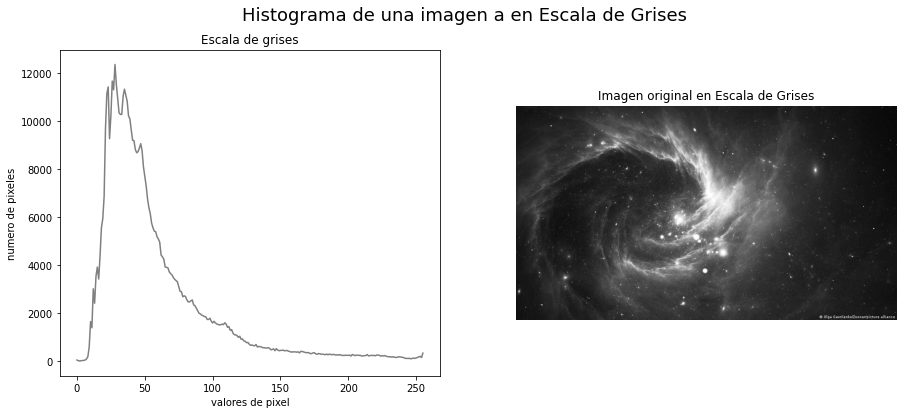

In [76]:
#EJERCICIO 4
img_bandw = cv2.imread('C:/Users/Vamc0/Documents/CARRERA ICE/9NO SEM 2023-1/VISION_COMPU/Practicas/imagenes/espacio.jpg', 0)

fig, ax = plt.subplots(1,2, figsize=(15,6))

hist  = cv2.calcHist([img_bandw],[0],None,[256],[0,256])
ax[0].plot(hist, color='gray')
ax[0].set_title('Escala de grises')
ax[0].set_xlabel('valores de pixel')
ax[0].set_ylabel('numero de pixeles')

ax[1].imshow(img_bandw, cmap='gray')
ax[1].set_title('Imagen original en Escala de Grises')
ax[1].axis('off')

fig.suptitle('Histograma de una imagen a en Escala de Grises', size=18)
fig.show()

C:\Users\Vamc0\AppData\Local\Temp\ipykernel_6624\3855077540.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


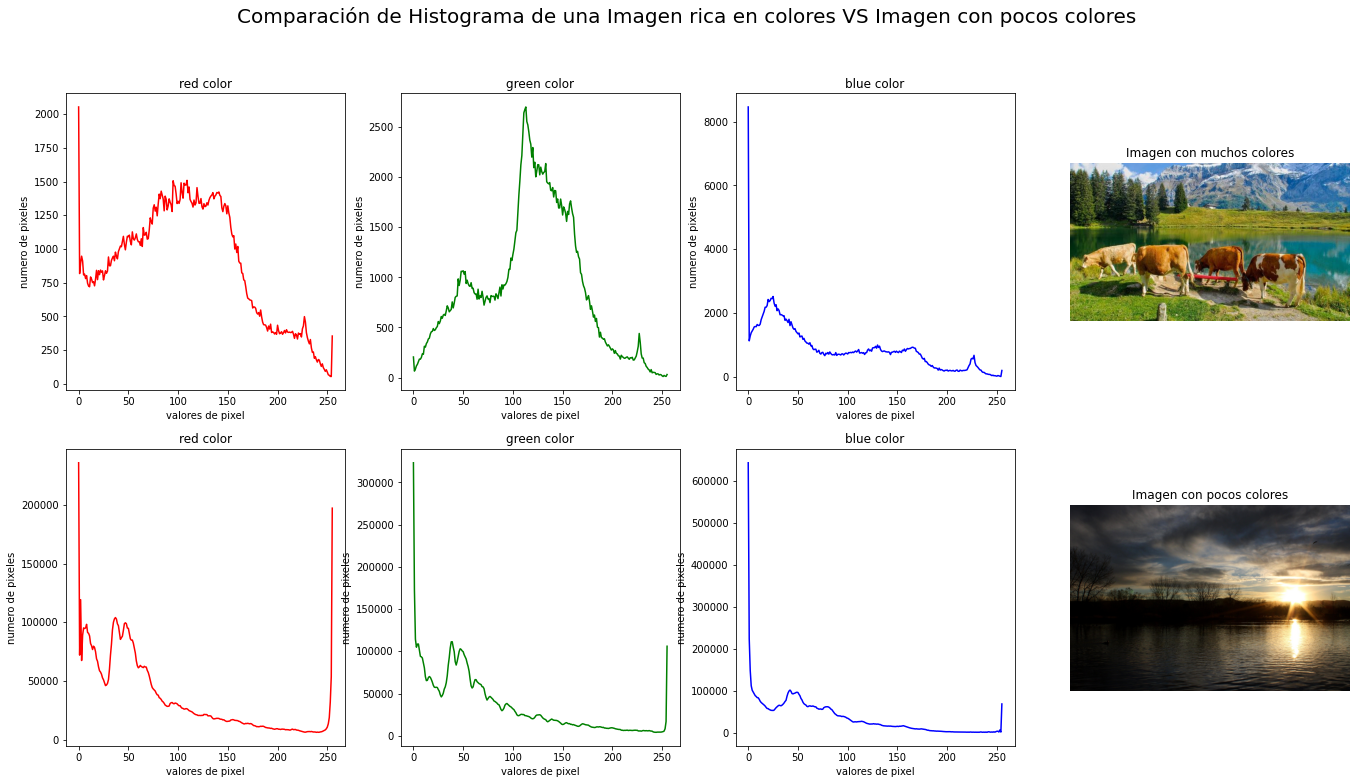

In [121]:
#EJERCICIO 4

img_color_bgr = cv2.imread('C:/Users/Vamc0/Documents/CARRERA ICE/9NO SEM 2023-1/VISION_COMPU/Practicas/imagenes/colores.jpg')
img_color_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

img_color_bgr_pocos = cv2.imread('C:/Users/Vamc0/Documents/CARRERA ICE/9NO SEM 2023-1/VISION_COMPU/Practicas/imagenes/pocos_colores.jpg')
img_color_rgb_pocos = cv2.cvtColor(img_color_bgr_pocos, cv2.COLOR_BGR2RGB)


colors = cv2.split(img_color_rgb)
colors_pocos = cv2.split(img_color_rgb_pocos)

fig, ax = plt.subplots(2,4, figsize=(23,12))
colors_rgb = ['red','green','blue']

for i, color in enumerate(colors):
    hist  = cv2.calcHist([color],[0],None,[256],[0,256])
    ax[0,i].plot(hist, color=colors_rgb[i])
    ax[0,i].set_title(colors_rgb[i]+' color')
    ax[0,i].set_xlabel('valores de pixel')
    ax[0,i].set_ylabel('numero de pixeles')

for i, color in enumerate(colors_pocos):
    hist  = cv2.calcHist([color],[0],None,[256],[0,256])
    ax[1,i].plot(hist, color=colors_rgb[i])
    ax[1,i].set_title(colors_rgb[i]+' color')
    ax[1,i].set_xlabel('valores de pixel')
    ax[1,i].set_ylabel('numero de pixeles')

ax[0,3].imshow(img_color_rgb)
ax[0,3].set_title('Imagen con muchos colores')
ax[0,3].axis('off')

ax[1,3].imshow(img_color_rgb_pocos)
ax[1,3].set_title('Imagen con pocos colores')
ax[1,3].axis('off')

fig.suptitle('Comparación de Histograma de una Imagen rica en colores VS Imagen con pocos colores', size=20)
fig.show()

Resolución de la imagen:  667 x 1000 pixeles


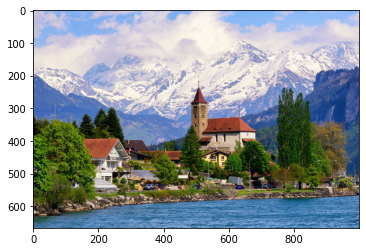

In [101]:
#EJERCICIO 5

img_color_bgr = cv2.imread(ubicacion_color)
img_color_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_color_rgb)
print('Resolución de la imagen: ',img_color_rgb.shape[0],'x',img_color_rgb.shape[1],'pixeles')
plt.show()

In [103]:
#EJERCICIO 6

from skimage.measure import block_reduce
import numpy as np
from skimage import io

C:\Users\Vamc0\AppData\Local\Temp\ipykernel_6624\1117385409.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Resolución de la imagen original:  667 x 1000 pixeles
Resolución de la imagen submuestreada:  223 x 334 pixeles


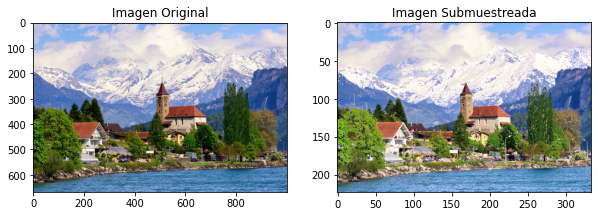

In [115]:
#EJERCICIO 6

factor_x = 3
factor_y = 3

downsampling = block_reduce(img_color_rgb, block_size=(factor_x,factor_y,1), func=np.max)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].imshow(img_color_rgb)
ax[0].set_title('Imagen Original')

ax[1].imshow(downsampling)
ax[1].set_title('Imagen Submuestreada')

fig.show()

print('Resolución de la imagen original: ',img_color_rgb.shape[0],'x',img_color_rgb.shape[1],'pixeles')
print('Resolución de la imagen submuestreada: ',downsampling.shape[0],'x',downsampling.shape[1],'pixeles')

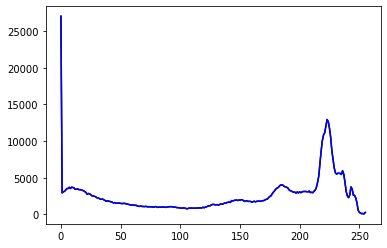

In [129]:
#Ejemplo 1.0

img_color_bgr = cv2.imread(ubicacion_color)

hist  = cv2.calcHist([img_color_bgr],[0],None,[256],[0,256])
plt.plot(hist, color='black')

dos = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

histo  = cv2.calcHist([dos],[2],None,[256],[0,256])
plt.plot(histo, color='blue')

plt.show()

#se ve una sola gráfica porque se enciman los valores por ser los mismos.